In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
# View all of the classes that automap found
for class_name in Base.classes.keys():
    print(class_name)
else:
    print("No tables found.")

measurement
station
No tables found.


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
print(f"Most recent date: {recent_date}")

Most recent date: 2017-08-23


Date one year prior: 2016-08-23 00:00:00


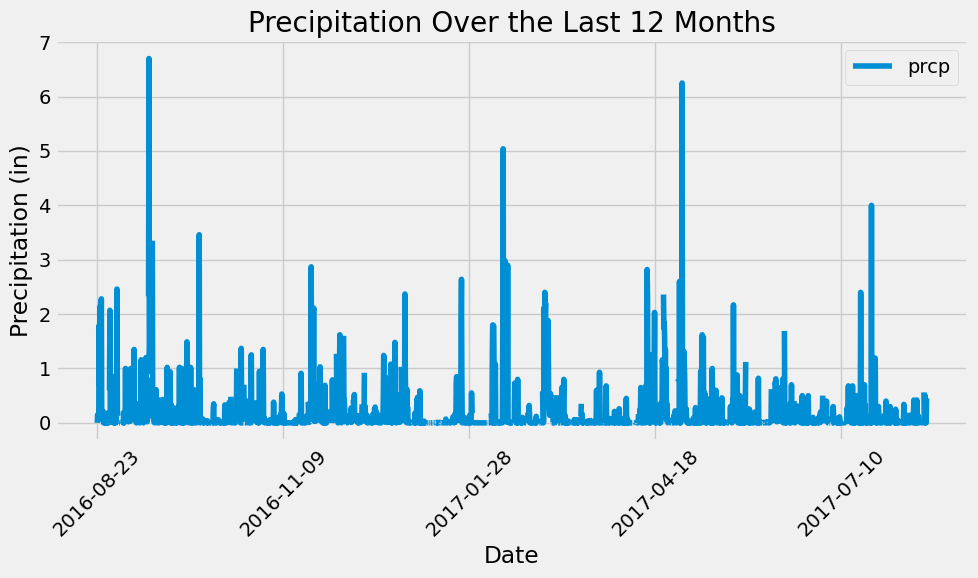

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year_date = pd.to_datetime(recent_date) - pd.DateOffset(years=1)
print(f"Date one year prior: {prev_year_date}")

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prev_year_date_str).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precipitation_data, columns=["date", "prcp"])


# Sort the dataframe by date
precip_df = precip_df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.set_index('date', inplace=True)
precip_df.plot(rot=45, figsize=(10, 6))
plt.title('Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.tight_layout()
plt.show()

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(precip_df.describe())

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(f"Total stations: {total_stations}")

Total stations: 9


In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
print(f"Most active stations: {active_stations}")

Most active stations: [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
print(f"Most active station: {most_active_station}")
temp_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station).all()

print(f"Temperature stats for {most_active_station}: {temp_stats}")

Most active station: USC00519281
Temperature stats for USC00519281: [(54.0, 85.0, 71.66378066378067)]


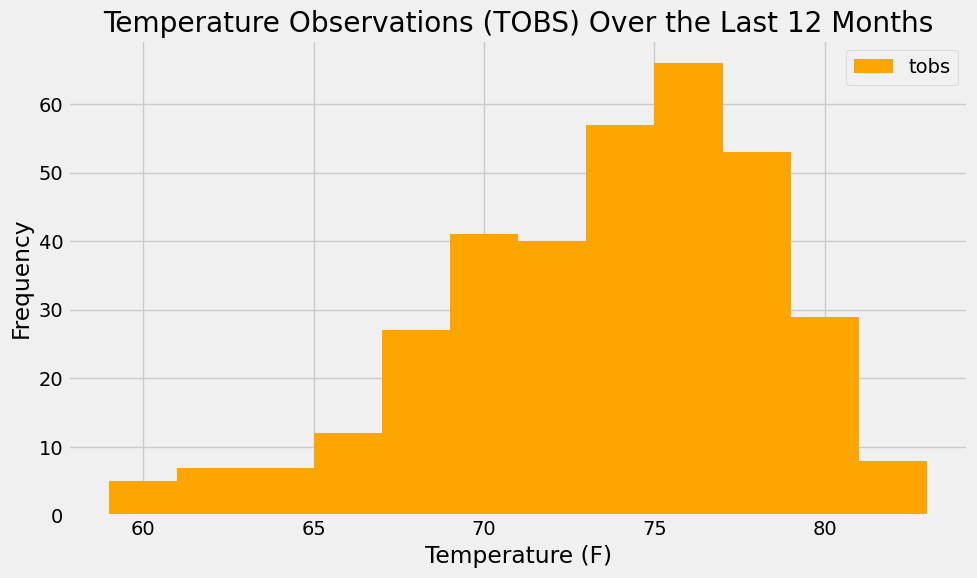

In [43]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= prev_year_date_str).all()

tobs_df = pd.DataFrame(tobs_data, columns=['tobs'])
tobs_df.plot(kind='hist', bins=12, figsize=(10, 6), color='orange')
plt.title('Temperature Observations (TOBS) Over the Last 12 Months')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Close Session

In [44]:
# Close Session
session.close()